<a href="https://colab.research.google.com/github/themysterysolver/ML-Learn/blob/main/ITML/CHAPTER2_SL2_SUPERVISED_LEARNING_ALGOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 18.2 MB/s eta 0:00:00


## k-Nearest Neighbors
- When considering more than one neighbor, we use ***voting*** to assign a
 label.
  - for a binary classification problem, but this method can be
 applied to datasets with any number of classes.
 - For more classes, we count how many
 neighbors belong to each class and again predict the most common class.

In [3]:
from sklearn.model_selection import train_test_split
import mglearn

In [6]:
X,y=mglearn.datasets.make_forge()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [9]:
clf.score(X_test,y_test)

0.8571428571428571

- Considering more and more neigh
bors leads to a smoother decision boundary. A smoother boundary corresponds to a
 simpler model.

###Breast cancer-KNearestNeighbors

In [17]:
from sklearn.datasets import load_breast_cancer

- If we don’t use `stratify`, the split might be imbalanced, leading to biased training (e.g., more benign samples than malignant).
This is especially important when dealing with imbalanced datasets.
- **fewer neighbors** corresponds to a more complex model
- But when **more neigh
bors** are considered, the model becomes simpler and the training accuracy drops.

In [24]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

In [30]:
trainAccuracy=[]
testAccuracy=[]

In [27]:
import matplotlib.pyplot as plt

In [25]:
print(len(X_train),len(y_train))

426 426


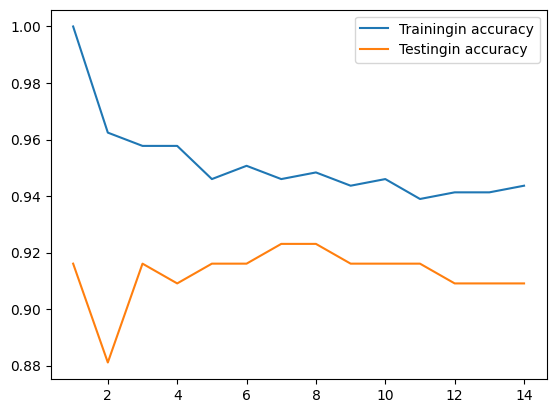

In [31]:
for i in range(1,15):
  clf=KNeighborsClassifier(i)
  clf.fit(X_train,y_train)
  trainAccuracy.append(clf.score(X_train,y_train))
  testAccuracy.append(clf.score(X_test,y_test))
plt.plot(range(1,15),trainAccuracy,label="Trainingin accuracy")
plt.plot(range(1,15),testAccuracy,label="Testingin accuracy")
plt.legend()